# 地理空间数据格式

地理空间数据的两个主要类型为栅格数据和矢量数据。栅格数据以数值形式的网格存储，在地图上呈现为像素。每个像素值代表地球表面的一个区域。矢量数据结构表示地球表面的特定特征，并为这些特征分配属性。我们先了解矢量数据与储存矢量数据的常见格式。

## 1. 矢量数据

矢量数据表示地球表面上特定要输以及这些要素的属性。矢量由被称为顶点的离散几何位置（x、y值）组成的，顶点定义了矢量数据的类型——点、线和面。
- 点 : 每个点都由单个X、Y坐标定义。点数据最常被用来表示不相邻的特征或者表示抽象的点。例如在一张地图上，点可以代表城市位置或地名。点是0维，既没有长度也没有面积。
- 线 : 线由许多（至少2个）连接的点组成。例如，一条道路或一条河流可以用一条线来表示。这条线是由一系列线段组成，道路或溪流中的每一个 "弯 "都代表一个顶点，有明确的x、y位置。线是1维，只能用于测量长度。
- 面 : 面由3个活更多个连接且闭合的顶点组成。测量流域边界、省界、湖泊等轮廓通常由面表示。面数据是2维的，可测量面积和周长。

![](../data/pnt_line_poly.png)

## 2. 存储点、线和面的文件——Shapefile

shapefile 是一种常用于地理空间分析的矢量数据文件格式。Shapefile 存储点、线和面要素的**位置**、**几何**和**属性**。 实际上该shapefile文件是由多个文件组成的，这些文件需存储在**同一目录中**。

其中有三个文件是必不可少的，它们分别是".shp", ".shx"与 ".dbf"文件。表示同一数据的一组文件其文件名前缀应该相同。例如，存储一个关于湖的几何与属性数据，就必须有lake.shp，lake.shx与lake.dbf三个文件。而其中“真正”的Shapefile的后缀为shp，然而仅有这个文件数据是不完整的，必须要把其他两个附带上才能构成一组完整的地理数据。**除了这三个必须的文件以外，还有八个可选的文件，使用它们可以增强空间数据的表达能力**

接下来下面读取一个站点流域的shp文件，不过我们提供的是一个`geojson`文件。

`geojson`是一种对地理数据结构进行编码的格式，可以表示几何信息、要素等，几何要素可以是**点，线，面，多点，多线和多面**。所以，我们首先将`geojson`文件转换为`shp`，同时也读取`geojson`文件。这里我们用到的是`geopandas`与`matploylib`两个工具包，第一个用于处理这些地理空间数据、第二个是用来画图的。

![](../data/geometric_elements.png)

ERROR 1: PROJ: proj_create_from_database: Open of /home/mengziwen/.conda/envs/hymod/share/proj failed


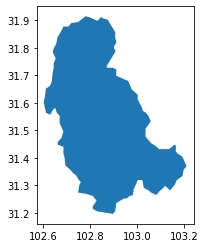

--保存成功，文件存放位置：../data/basin


In [1]:
import geopandas
import matplotlib.pyplot as plt

def saveShapefile(file_path, output_shapefile_name):
    try:
        data = geopandas.read_file('../data/stationbasins.geojson')
        ax = data.plot()
        plt.show()  # 显示生成的地图
        localPath = '../data/basin'#用于存放生成的文件
        data.to_file(localPath, driver='ESRI Shapefile', encoding='utf-8')
        print("--保存成功，文件存放位置："+localPath)
    except Exception as ex:
        print("--------JSON文件不存在，请检查后重试！----")
        pass
saveShapefile('../data/stationbasins.geojson', 'basins')

我们已经将`geojson`格式转换为`shapefile`格式，并储存在basin文件夹下。可以看到，不光只有一个.shp文件，还有其他一些文件，这些文件都是shapefile文件，只是最终用.shp文件来展示文件中的几何特征、要素等相关信息。

下面我们尝试读取并可视化.shp文件

In [3]:
#读取shp文件
import shapefile
file = shapefile.Reader('../data/basin/basin.shp')

In [4]:
#读取元数据
print(str(file.shapeType))  # 输出shp类型
print(file.encoding)# 输出shp文件编码
print(file.bbox)  # 输出shp的文件范围（外包矩形）
print(file.numRecords)  # 输出shp文件的要素数据
print(file.fields)# 输出所有字段信息

5
utf-8
[102.601, 31.1958, 103.2104, 31.9145]
1
[('DeletionFlag', 'C', 1, 0), ['grdc_no', 'N', 24, 15], ['river', 'C', 80, 0], ['station', 'C', 80, 0], ['altitude', 'N', 24, 15], ['dist_km', 'N', 24, 15], ['area_hys', 'N', 24, 15]]


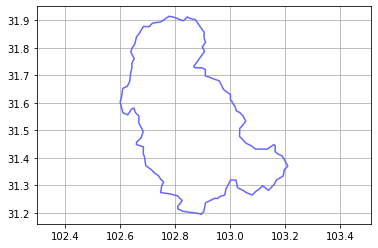

In [5]:
from matplotlib import pyplot as plt

border_shape = file
# 通过创建reader类的对象进行shapefile文件的读取
# border_points
border = border_shape.shapes()
# .shapes()读取几何数据信息，存放着该文件中所有对象的 几何数据
# border是一个列表
border_points = border[0].points
#print(border_points)# 返回第1个对象的所有点坐标
#border_points = [(x1,y1),(x2,y2),(x3,y3),…]

x, y = zip(*border_points)
# x=(x1,x2,x3,…)
# y=(y1,y2,y3,…)

fig, ax = plt.subplots()  # 生成一张图和一张子图
# plt.plot(x,y,'k-') # x横坐标 y纵坐标 ‘k-’线性为黑色
plt.plot(x, y, color='#6666ff', label='fungis')  # x横坐标 y纵坐标 ‘k-’线性为黑色
ax.grid()  # 添加网格线
ax.axis('equal')
plt.show()